#Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load training data
train_data = pd.read_csv('/content/drive/MyDrive/House_Price_prodigy_dataset/train.csv')

# Load test data
test_data = pd.read_csv('/content/drive/MyDrive/House_Price_prodigy_dataset/test.csv')


In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

checking columns of test data

In [52]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train_data.shape

(1460, 81)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

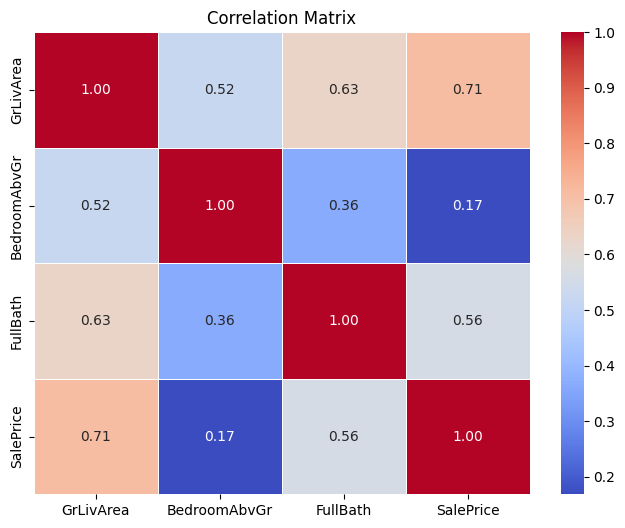

In [43]:
# Calculate and plot the correlation matrix
correlation_matrix = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [41]:
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        # Fill missing values with the mode for categorical features
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mode()[0], inplace=True)
    else:
        # Fill missing values with the mean for numeric features
        train_data[column].fillna(train_data[column].mean(), inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mean(), inplace=True)


In [44]:
# Selecting relevant features and target
features = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath','HalfBath','TotRmsAbvGrd']]
target = train_data['SalePrice']

# Handle missing values in features (if any)
features = features.fillna(features.mean())


In [45]:
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)


In [46]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [47]:
# Make predictions on validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
mae = mean_squared_error(y_val, y_val_pred, squared=False)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
#print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 2809126045.944859
R-squared: 0.6337670693441046
Mean Absolute Error: 53001.18909934813
Intercept: 49001.90923873574


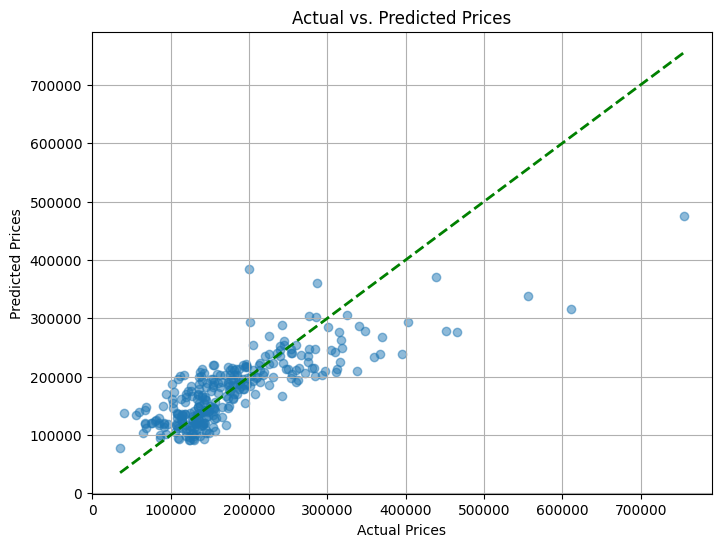

In [48]:
# Visualize actual vs. predicted values on the validation set
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'g--', linewidth=2)
plt.show()

predicting value on user input

In [63]:
# Custom input data for prediction
example = pd.DataFrame({
    'GrLivArea': [2000],
    'BedroomAbvGr': [3],
    'FullBath': [2],
    'HalfBath': [1],
    'TotRmsAbvGrd': [7]
})

# Make predictions on the custom input data
example_prediction = model.predict(example[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']]) # Include all features used during training
print(f'Example Prediction: ${example_prediction[0]:,.2f}')

# Prepare the test data for prediction
test_features = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']] # Include all features used during training
test_features = test_features.fillna(test_features.mean())

# Make predictions on the test set
test_predictions = model.predict(test_features)

# Save predictions to CSV
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)

print('Submission file created successfully!')

Example Prediction: $240,896.28
Submission file created successfully!
